#  GS Real Estate - Price Predictor

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002788FB265C8>,
      dtype=object)

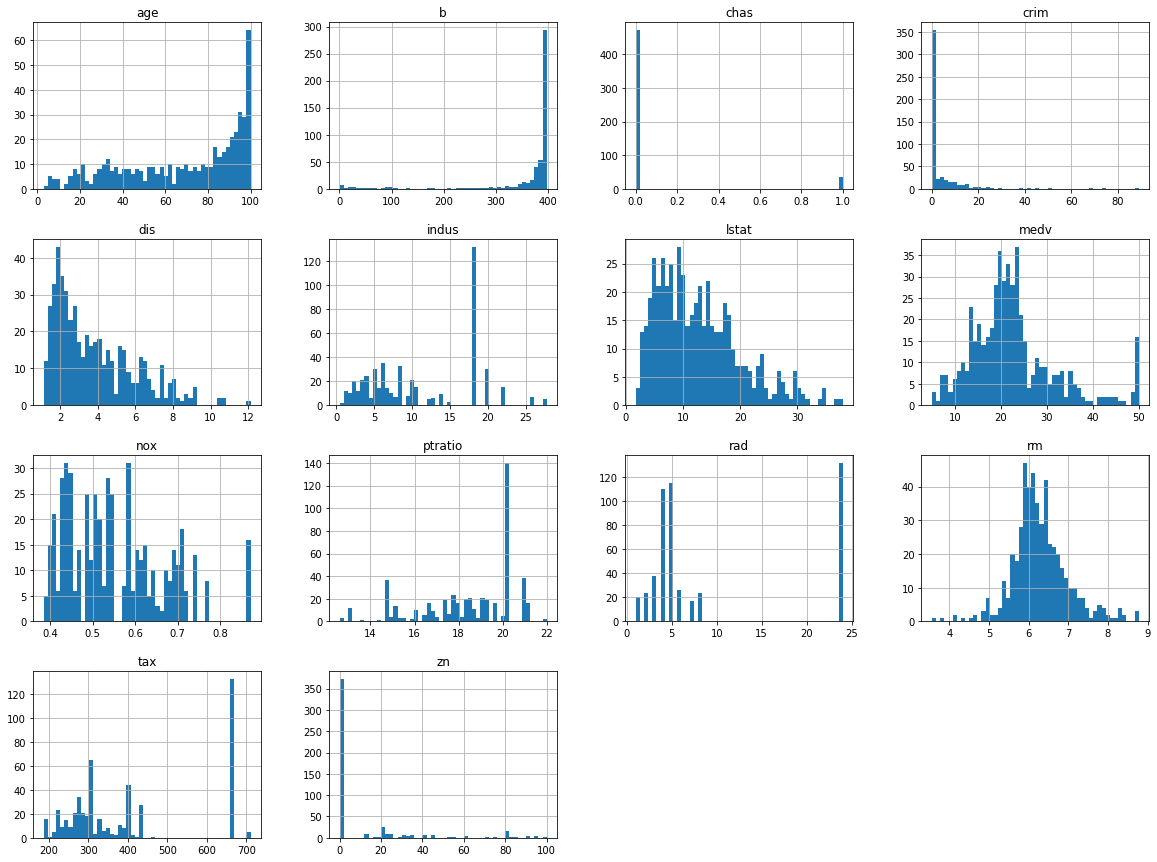

In [6]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [7]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [8]:
train_set, test_set = split_train_test(housing, 0.2)

In [9]:
print(train_set, test_set)

         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
75    0.09512   0.0  12.83     0  0.4370  6.286  45.0  4.5026    5  398   
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   

     ptratio       b  lstat  medv  
75      18.7  383.23   8.94  21.4  
477     20.2  349.48  24.91

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state  = 42)
for train_index, test_index in split.split(housing, housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
housing = strat_train_set
strat_test_set['chas'].value_counts(), strat_train_set['chas'].value_counts()




(0    95
 1     7
 Name: chas, dtype: int64,
 0    376
 1     28
 Name: chas, dtype: int64)

## Coorelations

In [13]:
corr_matrix = housing.corr()

In [14]:
corr_matrix['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.679894
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027890BF7948>,
      dtype=object)

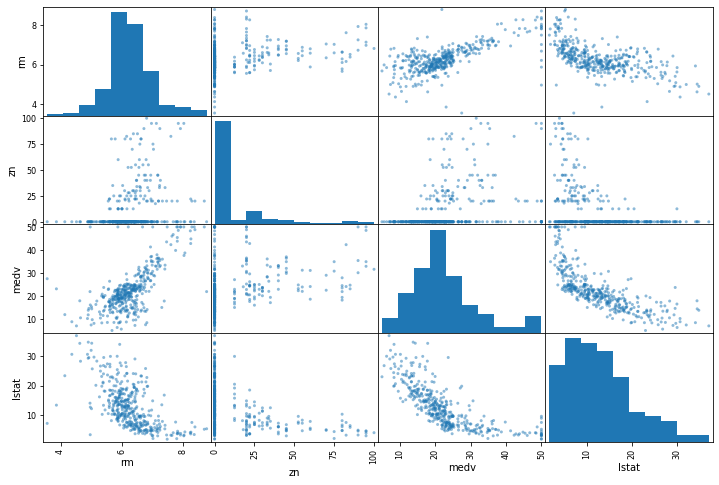

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["rm", "zn", "medv", "lstat"]
scatter_matrix(housing[attributes], figsize=(12,8))

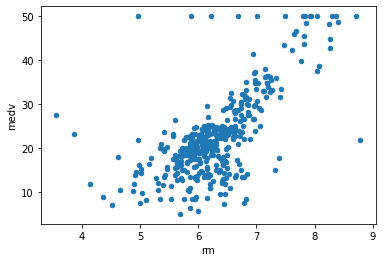

In [16]:
housing.plot(kind="scatter", x="rm", y="medv")

## Attribute combinations

In [17]:
housing['taxrm'] = housing['tax']/housing['rm']

In [18]:
housing['taxrm']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: taxrm, Length: 404, dtype: float64

In [19]:
corr_matrix = housing.corr()

## Missing Attributes

In [20]:
housing = strat_train_set.drop('medv', axis=1)
housing_labels = strat_train_set['medv'].copy()

In [21]:
corr_matrix['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.679894
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
taxrm     -0.525160
lstat     -0.740494
Name: medv, dtype: float64

In [22]:
#1.remove data points with na
housing.dropna(subset = ['rm'])
#2.remove complete column
housing.drop('rm', axis=1)
#3.fill the median in place of na

median = housing['rm'].median()
housing['rm'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [23]:
housing.shape

(404, 14)

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21000000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 5.39474541e+01])

In [26]:
X = imputer.transform(housing)


In [27]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [28]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,taxrm
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.480852
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.457774
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


## Scikit-learn Design

Primary, three type of objects
1. Estimators
It estimaates some parameter base on a dataet.Eg Imputer 
It has a fit method and transform method
Fit method - Fits the dataset and calculates internal parameters

2. Transformers
Transform method takes input and returns output based on learnings from fit()
It has also has a convenience function which fits and transform.
3. Predictors
LinearRegression Model. It has fit nd predict functions. It also gives score function which will evaluate the predictions.

## Feature Scaling

There are two types of feature scaling methods:
    1. Min-Max scaling (Normalization) [(value-min)/max-min]
    sklear provides a class called MinMaxScaler for this
    2. Standardization [(value-mean)/std_deviation]
    Sklearn provides a class called Standard Scaler for this

## Creating Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])


In [30]:
housing = housing.drop('taxrm',axis=1)
housing_num_tr = my_pipeline.fit_transform(housing)
housing.shape

(404, 13)

In [31]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for GS Real EState

In [32]:
housing_num_tr.shape

(404, 13)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor

#model = LinearRegression()
#model  = DecisionTreeRegressor()
model  = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
some_data = housing.iloc[:5]


In [35]:
some_labels = housing_labels.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([22.527, 25.535, 16.229, 23.363, 23.387])

In [38]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: medv, dtype: float64

## Evalauting the model

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
line_rmse = np.sqrt(lin_mse)
line_rmse

1.1630122644356427

## Using better evaluation technique - Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = (np.sqrt(-scores))
rmse_scores

array([2.80771915, 2.70494939, 4.39952315, 2.55603067, 3.32453776,
       2.53247315, 4.79801114, 3.27205951, 3.28241181, 3.19348244])

In [41]:
def scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std Dev: ", scores.std())

In [42]:
scores(rmse_scores)

Scores:  [2.80771915 2.70494939 4.39952315 2.55603067 3.32453776 2.53247315
 4.79801114 3.27205951 3.28241181 3.19348244]
Mean:  3.287119816217655
Std Dev:  0.7213446572200697


## Saving the model

In [51]:
from joblib import dump, load
dump(model, "GS.joblib")

['GS.joblib']

## Testing the model on test data

In [48]:
x_test = strat_test_set.drop('medv', axis = 1)
y_test = strat_test_set['medv'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))


[25.083 11.592 25.545 22.016 18.384 15.108 19.992 14.368 31.892 40.393
 19.748 11.769 24.037 28.724 19.433 10.517 31.876 14.482 23.579 18.761
 19.641 18.082 17.54  22.078 18.32  30.47  16.266 32.763  8.897 33.838
 24.008 21.246 23.088 10.994 20.876 11.264 42.506 24.36  23.293 41.51
 23.83  29.639 20.457 20.906 19.263 33.644 44.494 19.88  20.165 21.769
 21.512 14.708 21.32  15.086 24.762 32.839 42.412 28.135 19.397 20.85
 47.428 10.17  18.535 24.606 15.002 33.016 19.463 17.786 19.002 33.884
 27.242 22.853 21.469 22.538 35.259 12.64  15.839 20.006 20.689 21.375
 22.331 21.671 14.175 22.861 20.876 21.135 13.944 21.295 22.067 23.166
 18.956 27.224  7.258 25.967 18.556 29.995 19.64  31.196 14.616 26.521
 20.82  20.092] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [49]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])